Analisis Exploratorio de datos EDA

contexto

Medical Appointment No Shows



CARGA Y VERIFICACION DE DATOS

conda create -n medicalPrediction python=3.11.13 

conda activate medicalPrediction

conda update -n base -c defaults conda
conda install -c conda-forge matplotlib
conda install pandas  
conda install numpy
conda install seaborn
conda install -c conda-forge statsmodels



In [37]:
# Importamos las librerías y funciones
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis, chi2_contingency, kstest
import statsmodels.api as sm    # Librería para modelos, pruebas estadísticas y otras herramientas estadísticas.

In [38]:
DATA_DIR = Path.cwd().resolve().parent / "datos"

DATA_DIR

PosixPath('/Users/diegofernandonunezdiaz/Library/Mobile Documents/com~apple~CloudDocs/UMEDELLIN/Proyectos1/trabajoFinal/datos')

In [39]:
print(DATA_DIR)
archivo = pd.read_csv(DATA_DIR / "01_datos_medical_prediction.csv")

/Users/diegofernandonunezdiaz/Library/Mobile Documents/com~apple~CloudDocs/UMEDELLIN/Proyectos1/trabajoFinal/datos


In [6]:
archivo.sample(10, random_state=100)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
83124,9.962637e+12,5586183,M,2016-04-15T07:23:39Z,2016-05-30T00:00:00Z,19,ITARARÉ,0,0,0,0,0,1,Yes
98557,4.483289e+12,5745460,F,2016-05-30T11:54:39Z,2016-06-01T00:00:00Z,40,DO MOSCOSO,0,0,0,0,0,0,No
81139,5.451535e+12,5665021,F,2016-05-05T13:49:42Z,2016-05-05T00:00:00Z,43,SÃO CRISTÓVÃO,0,0,0,0,0,0,No
26901,7.849294e+13,5678169,F,2016-05-10T08:10:32Z,2016-05-17T00:00:00Z,5,FORTE SÃO JOÃO,0,0,0,0,0,0,No
62632,6.914179e+14,5411541,M,2016-03-01T07:48:14Z,2016-05-02T00:00:00Z,55,JARDIM CAMBURI,0,0,0,0,0,1,No
73588,9.973478e+14,5664485,M,2016-05-05T12:32:44Z,2016-05-05T00:00:00Z,52,MARIA ORTIZ,0,0,0,0,0,0,No
19356,6.693200e+14,5614066,F,2016-04-25T10:02:40Z,2016-05-02T00:00:00Z,32,ILHA DE SANTA MARIA,0,0,0,0,0,1,No
35548,2.114425e+12,5565596,F,2016-04-11T09:07:31Z,2016-05-05T00:00:00Z,33,JESUS DE NAZARETH,0,0,0,0,0,1,Yes
957,9.189694e+13,5235643,F,2016-01-11T09:08:10Z,2016-04-29T00:00:00Z,70,GURIGICA,0,1,1,0,0,1,No
23590,7.574453e+13,5541286,F,2016-04-05T07:49:25Z,2016-05-11T00:00:00Z,66,SANTA TEREZA,0,0,0,0,0,1,No


In [40]:
archivo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [41]:
# Análisis exploratorio de datos (EDA)
# 1. Estadísticas descriptivas
print(archivo.describe(include='all'))   
#visualizacion de las variables categoricas y numericas
print("lista del tipo de variables---------------: ")
print(archivo.dtypes)
print("Numero de variables unicas por cada variable: ")
print(archivo.nunique())        


           PatientId  AppointmentID  Gender          ScheduledDay  \
count   1.105270e+05   1.105270e+05  110527                110527   
unique           NaN            NaN       2                103549   
top              NaN            NaN       F  2016-05-06T07:09:54Z   
freq             NaN            NaN   71840                    24   
mean    1.474963e+14   5.675305e+06     NaN                   NaN   
std     2.560949e+14   7.129575e+04     NaN                   NaN   
min     3.921784e+04   5.030230e+06     NaN                   NaN   
25%     4.172614e+12   5.640286e+06     NaN                   NaN   
50%     3.173184e+13   5.680573e+06     NaN                   NaN   
75%     9.439172e+13   5.725524e+06     NaN                   NaN   
max     9.999816e+14   5.790484e+06     NaN                   NaN   

              AppointmentDay            Age   Neighbourhood    Scholarship  \
count                 110527  110527.000000          110527  110527.000000   
unique         

CONVERSION DE DATOS

In [42]:
#CONVERSION DE DATOS
cols_categoricas = ['Gender', 'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show']
archivo[cols_categoricas] = archivo[cols_categoricas].astype('category')
archivo['AppointmentDay'] = pd.to_datetime(archivo['AppointmentDay'])
archivo['ScheduledDay'] = pd.to_datetime(archivo['ScheduledDay'])   
archivo['Age'] = archivo['Age'].astype(int)
archivo['No-show'] = archivo['No-show'].map({'No': 0, 'Yes': 1})
archivo.dtypes


PatientId                     float64
AppointmentID                   int64
Gender                       category
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                category
Scholarship                  category
Hipertension                 category
Diabetes                     category
Alcoholism                   category
Handcap                      category
SMS_received                 category
No-show                      category
dtype: object

In [21]:
archivo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  category           
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  category           
 7   Scholarship     110527 non-null  category           
 8   Hipertension    110527 non-null  category           
 9   Diabetes        110527 non-null  category           
 10  Alcoholism      110527 non-null  category           
 11  Handcap         110527 non-null  category           
 12  SMS_received    110527 non-null  category           
 13  No-show       

In [43]:
archivo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  category           
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  category           
 7   Scholarship     110527 non-null  category           
 8   Hipertension    110527 non-null  category           
 9   Diabetes        110527 non-null  category           
 10  Alcoholism      110527 non-null  category           
 11  Handcap         110527 non-null  category           
 12  SMS_received    110527 non-null  category           
 13  No-show       

In [44]:
archivo.describe(include='category')

,Gender,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,110527,110527,110527,110527,110527,110527,110527,110527,110527
unique,2,81,2,2,2,2,5,2,2
top,F,JARDIM CAMBURI,0,0,0,0,0,0,0
freq,71840,7717,99666,88726,102584,107167,108286,75045,88208


In [45]:
# Cargar datos de un archivo CSV en python
archivo = pd.read_csv('KaggleV2-May-2016.csv')
print(archivo.head())
print(archivo.info())
print(archivo.describe())
print(archivo.isnull().sum())


      PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0      

In [46]:
print(archivo.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB
None


Clasificacion de variables

In [47]:
print("lista del tipo de variables: ")
print(archivo.dtypes)
print("Numero de variables unicas por cada variable: ")
print(archivo.nunique())

lista del tipo de variables: 
PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object
Numero de variables unicas por cada variable: 
PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64


Limieza de datos

In [48]:

# Eliminar filas duplicadas 
archivo = archivo.drop_duplicates()
# Verificar si hay valores nulos
print(archivo.isnull().sum())
# Eliminar filas con valores nulos
archivo = archivo.dropna()
# Verificar si hay valores nulos después de la limpieza
print(archivo.isnull().sum())       


PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64
PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64


Descripcion de lo datos

In [49]:
# Descripción de los datos  
archivo.describe()





,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000



Observación General

Los datos provienen de 110,527 registros, lo que indica una muestra muy grande y representativa. El análisis se concentra en variables demográficas (Age), sociales (Scholarship), clínicas (Hipertension, Diabetes, Alcoholism, Handcap), y operativas (SMS_received). El objetivo parece ser analizar factores que influyen en la inasistencia a citas, variable resumida en No-show

Puntos clave de las variables

Age (edad):

Media de 37 años, rango amplio (-1 a 115), y desviación estándar alta, signo de heterogeneidad en la muestra. El valor mínimo negativo sugiere presencia de algún error de registro.​

Scholarship (beca social):

El 9.8% tiene cobertura de beca social, mientras que la mayoría no la tiene. Esta variable es binaria (0 y 1).​

Hipertension, Diabetes, Alcoholism, Handcap:

La mayoría de pacientes no presenta estas condiciones (media baja), pero existen algunos con valores altos y, en el caso de Handcap, hasta 4, lo que indica niveles.​

SMS_received:

Un 32% de los pacientes recibe un SMS recordatorio, lo que puede relacionarse con la asistencia a la cita.​

Variables operacionales

No-show:

El 20.2% de las citas no son atendidas por los pacientes (No = 88,208, Yes = 22,319), lo que representa una tasa de inasistencia significativa que puede afectar la eficiencia del sistema de salud.​

Observaciones adicionales

Hay evidencia de calidad de datos deficiente en la variable Age (valores negativos), lo que podría indicar errores de captura que deben corregirse antes de cualquier análisis estadístico avanzado.​

El bajo promedio en variables de condiciones médicas sugiere que la población es, en general, bastante saludable, aunque sí existen casos notables.​

El análisis de inasistencia (No-show) será relevante para identificar patrones y posibles predictores, sobre todo considerando factores sociales, recordatorios y condiciones médicas.​

REVISION DE VALORES AUSENTES

In [50]:
# Conteo total de valores faltantes por variablearchivo
archivo.isnull().sum() # Suma los valores 'True=1' (celda NaN)

# Porcentaje de valores faltantes por variable
(archivo.isnull().mean() * 100).round(2) # Dado que solo hay valores 'True=1' y 'False=0' el promedio sería equivalente a una proporción

PatientId         0.0
AppointmentID     0.0
Gender            0.0
ScheduledDay      0.0
AppointmentDay    0.0
Age               0.0
Neighbourhood     0.0
Scholarship       0.0
Hipertension      0.0
Diabetes          0.0
Alcoholism        0.0
Handcap           0.0
SMS_received      0.0
No-show           0.0
dtype: float64

no se encuentran valores ausentes o nulos

TABLAS Y GRAFICAS

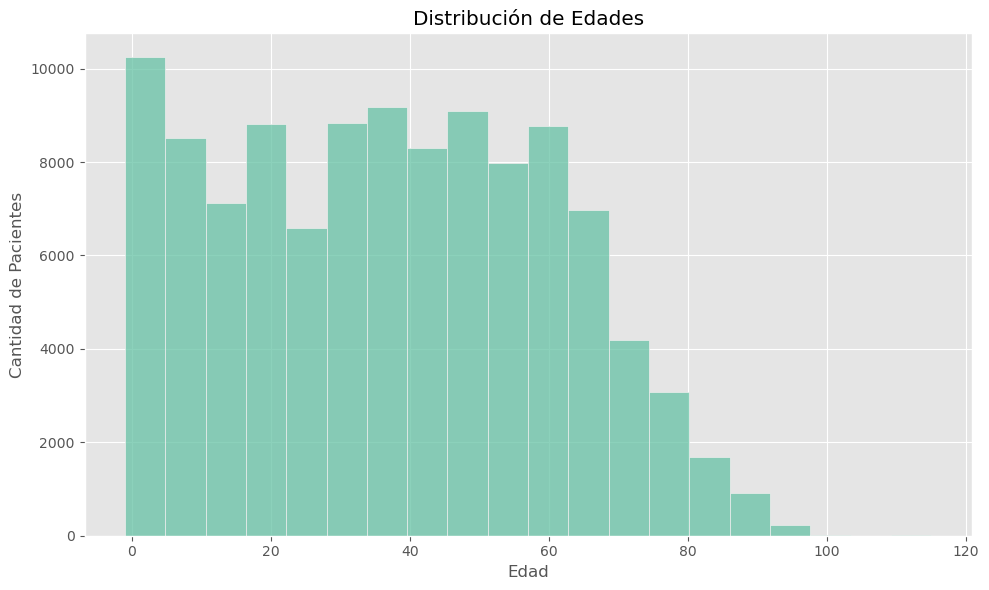

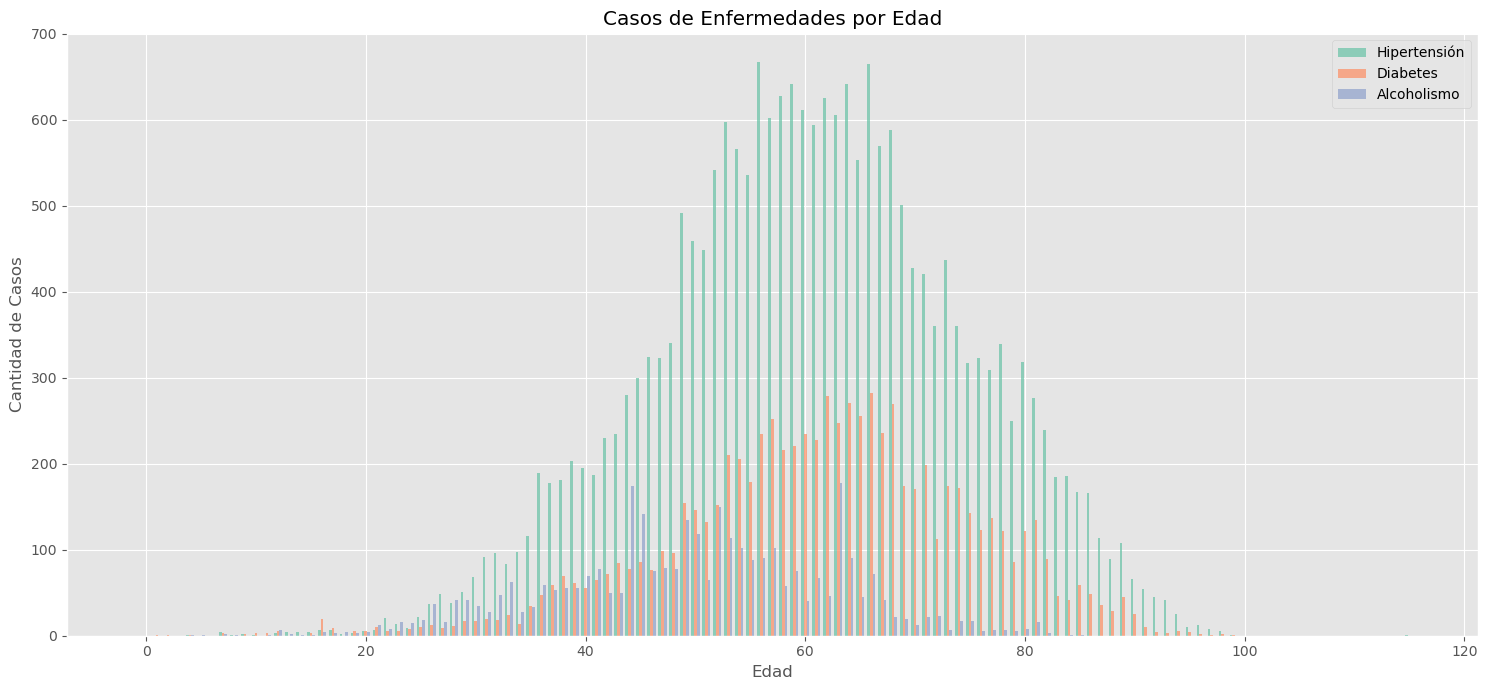

In [53]:
# 1. Gráfico de barras de distribución de edad
plt.figure(figsize=(10,6))
sns.histplot(archivo['Age'], bins=20, kde=False)
plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Cantidad de Pacientes')
plt.tight_layout()
plt.show()

# 2. Gráfico de barras de enfermedades por edad
# Agrupar por edad y sumar casos de cada enfermedad
edad_enfermedades = archivo.groupby('Age')[['Hipertension', 'Diabetes', 'Alcoholism']].sum().reset_index()

plt.figure(figsize=(15,7))
width = 0.25
x = edad_enfermedades['Age']

plt.bar(x - width, edad_enfermedades['Hipertension'], width=width, label='Hipertensión', alpha=0.7)
plt.bar(x, edad_enfermedades['Diabetes'], width=width, label='Diabetes', alpha=0.7)
plt.bar(x + width, edad_enfermedades['Alcoholism'], width=width, label='Alcoholismo', alpha=0.7)

plt.title('Casos de Enfermedades por Edad')
plt.xlabel('Edad')
plt.ylabel('Cantidad de Casos')
plt.legend()
plt.tight_layout()
plt.show()


       Condicion  Presencia Gender      Edadm
0   Hipertension          0      F  33.030283
1   Hipertension          0      M  28.289868
2   Hipertension          1      F  60.492861
3   Hipertension          1      M  60.900186
4       Diabetes          0      F  36.988450
5       Diabetes          0      M  31.965530
6       Diabetes          1      F  61.407599
7       Diabetes          1      M  61.288404
8     Alcoholism          0      F  38.782857
9     Alcoholism          0      M  32.666430
10    Alcoholism          1      F  45.310711
11    Alcoholism          1      M  52.044923


/var/folders/rj/1mp3qrxx189flshbl9vynrcr0000gn/T/ipykernel_11242/1158918113.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Condicion', y='Edadm', hue='Gender', data=resumen_df, ci=None)


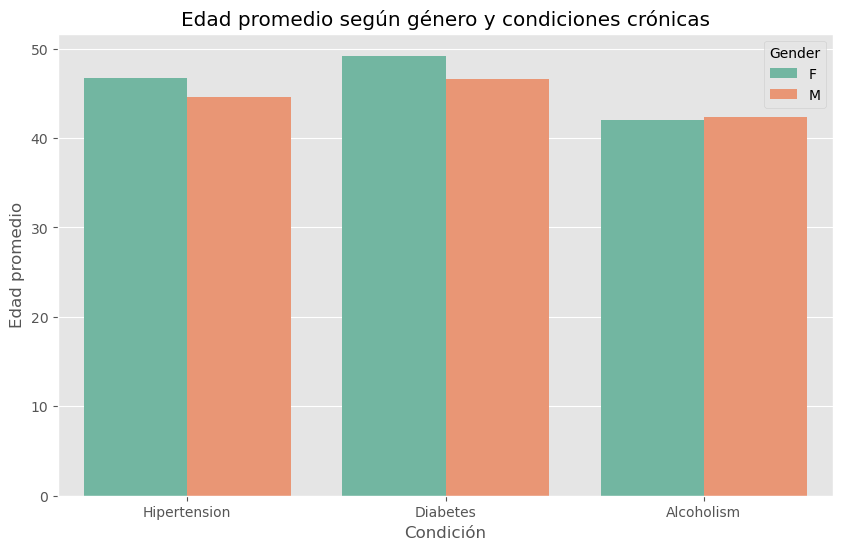

In [54]:


cond_cols = ['Hipertension', 'Diabetes', 'Alcoholism']
resumen = []

for cond in cond_cols:
    tabla = (
        archivo.groupby([cond, 'Gender'])
        .agg(Edadm=('Age','mean'))
        .reset_index()
    )
    tabla['Condicion'] = cond
    tabla.rename(columns={cond: 'Presencia'}, inplace=True)
    resumen.append(tabla[['Condicion', 'Presencia', 'Gender', 'Edadm']])
resumen_df = pd.concat(resumen, ignore_index=True)  
print(resumen_df)
# Visualización
plt.figure(figsize=(10,6))
sns.barplot(x='Condicion', y='Edadm', hue='Gender', data=resumen_df, ci=None)
plt.title("Edad promedio según género y condiciones crónicas")
plt.xlabel("Condición")
plt.ylabel("Edad promedio")
plt.show()      








Feature Engineering

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer